<h1 style="color:blue"><u> Exploratory Data Analysis </u></h1>

- **What is Exploratory Data Analysis?**<br>

   Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to    check assumptions with the help of summary statistics and graphical representations.It is often known as Data Profiling.It is    an unavoidable step in the entire journey of data analysis right from the business understanding part to the deployment of      the models created.EDA is where we get the basic understanding of the data in hand which then helps us in the further process    of Data Cleaning & Data Preparation.

   - EDA can be leveraged to check for outliers, patterns, and trends in the given data.
   - EDA helps to find meaningful patterns in data.
   - EDA provides in-depth insights into the data sets to solve our business problems.
   - EDA gives a clue to impute missing values in the dataset 
 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv("supermarket_sales - Sheet1.csv",parse_dates=["Date"])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [20]:
#print random 5 rows from the dataset
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
124,268-27-6179,B,Mandalay,Member,Female,Fashion accessories,56.47,8,22.588,474.348,2019-03-09,14:57,Ewallet,451.76,4.761905,22.588,7.3
475,502-05-1910,A,Yangon,Normal,Male,Health and beauty,65.18,3,9.777,205.317,2019-02-25,20:35,Credit card,195.54,4.761905,9.777,6.3
912,453-33-6436,A,Yangon,Normal,Female,Home and lifestyle,93.12,8,37.248,782.208,2019-02-07,10:09,Cash,744.96,4.761905,37.248,6.8
878,448-61-3783,A,Yangon,Normal,Female,Electronic accessories,90.02,8,36.008,756.168,2019-03-21,16:08,Credit card,720.16,4.761905,36.008,4.5
220,239-36-3640,B,Mandalay,Normal,Male,Electronic accessories,45.35,6,13.605,285.705,2019-01-31,13:44,Ewallet,272.10,4.761905,13.605,6.1


In [21]:
#print the shape of the dataset
df.shape

(1000, 17)

In [22]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 1000
Number of Columns: 17


In [23]:
#Check for null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [28]:
#Check overall statistics 
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<u>**Univariate Analysis**</u>

  Analyzing/visualizing the dataset by taking one variable at a time.Data visualization is essential.We must decide what charts   to plot to better understand the data.We visualize our data using Matplotlib and Seaborn libraries.

  Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.Seaborn is also a python library built   on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy.

  Univariate analysis can be done for both Categorical and Numerical variables.Categorical variables can be visualized using a     Count plot, Bar Chart, Pie Plot, etc.Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

  In our example, we have done a Univariate analysis using Histogram and Box Plot for continuous Variables.In the below fig, a     histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

In [29]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [30]:
#Separate categorical and numerical columns
#As number of unique values in numerical column will be greater than 10
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)

In [31]:
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

In [32]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

<AxesSubplot:xlabel='Branch', ylabel='count'>

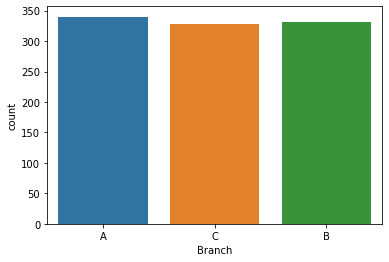

In [34]:
# Find Aggregate Sales among Branches
sns.countplot(df['Branch'])

<AxesSubplot:ylabel='Branch'>

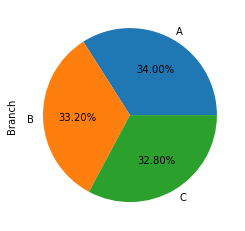

In [36]:
df['Branch'].value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:>

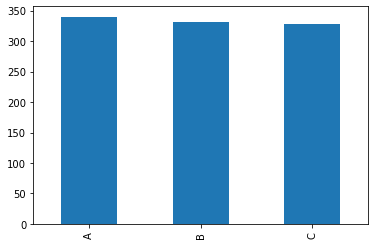

In [37]:
df['Branch'].value_counts().plot(kind="bar")

<AxesSubplot:>

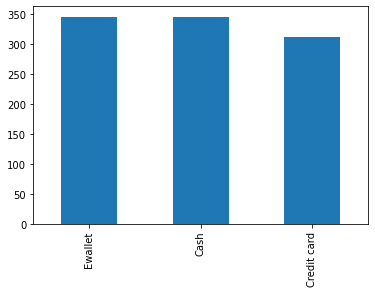

In [38]:
#Find The Most Popular Payment Method Used By Customers (Categorical Column)
df['Payment'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Rating', ylabel='Density'>

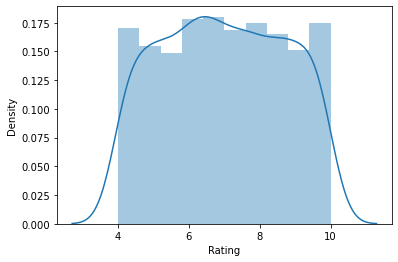

In [40]:
#Find The Distribution of Customer Ratings. (Numerical Column)
sns.distplot(df['Rating'])

In [41]:
df['Rating'].skew()

0.00900964876573073

In [42]:
df['cogs'].skew()

0.8925698049581418

<AxesSubplot:xlabel='cogs'>

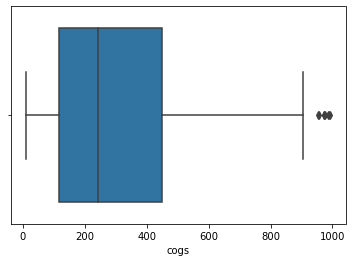

In [43]:
sns.boxplot(df['cogs'])

<h2><u>Bivariate Analysis / Multivariate Analysis</u></h2>

In [46]:
#Does The Cost of Goods Sold Affect The Ratings That The Customers Provide? (Numerical - Numerical)
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

In [47]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

<AxesSubplot:xlabel='cogs', ylabel='Rating'>

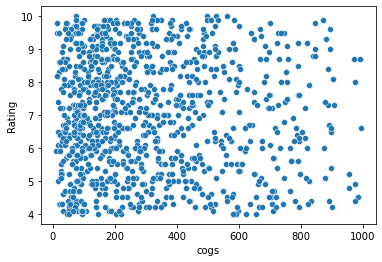

In [50]:
sns.scatterplot(df['cogs'],df['Rating'])

<AxesSubplot:xlabel='gross income', ylabel='Rating'>

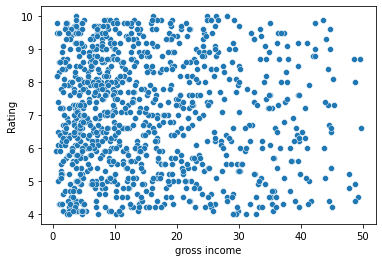

In [51]:
#Does Gross Income Affect The Ratings That The Customers Provide? (Numerical - Numerical)
sns.scatterplot(df['gross income'],df['Rating'])

In [53]:
#Find The Most Profitable Branch As Per Gross Income. (Numerical - Categorical)
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

In [54]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

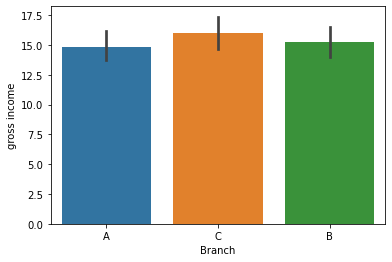

In [55]:
sns.barplot(df['Branch'],df['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

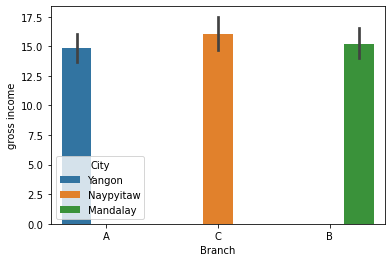

In [56]:
sns.barplot(df['Branch'],df['gross income'],hue=df['City'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

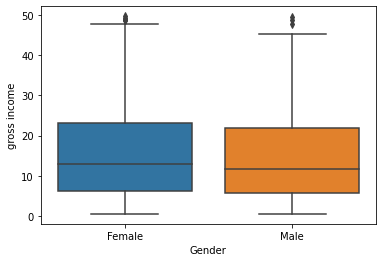

In [57]:
#Is There Any Relationship Between Gender And Gross Income? (Numerical - Categorical)
sns.boxplot(df['Gender'],df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

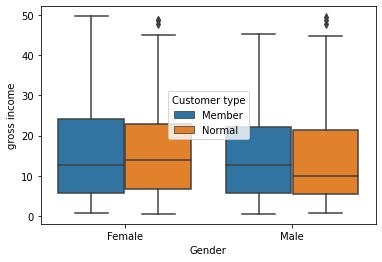

In [58]:
sns.boxplot(df['Gender'],df['gross income'],hue=df['Customer type'])

In [59]:
#Find The Product Line That Generates The Most Income. (Numerical - Categorical)
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

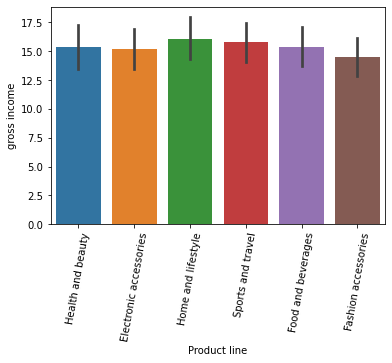

In [60]:
sns.barplot(df['Product line'],df['gross income'])
plt.xticks(rotation=80)
plt.show()

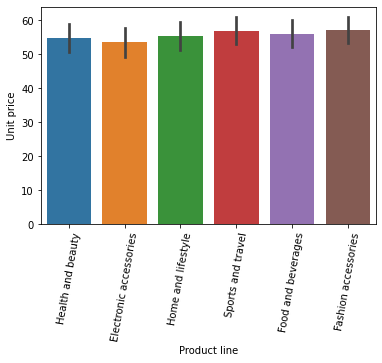

In [62]:
#Find The Highest Unit Price In The Product Line. (Numerical - Categorical)
sns.barplot(df['Product line'],df['Unit price'])
plt.xticks(rotation=80)
plt.show()

In [63]:
#Find Different Payment Methods Used By Customers Citywise.(Categorical -Categorical)
pd.crosstab(df['City'],df['Payment'])

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<AxesSubplot:xlabel='Payment', ylabel='City'>

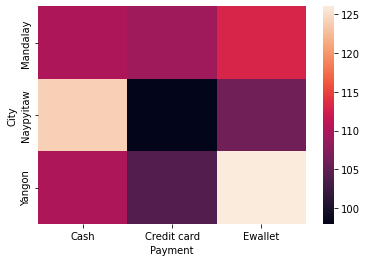

In [64]:
sns.heatmap(pd.crosstab(df['City'],df['Payment']))

<AxesSubplot:xlabel='Product line'>

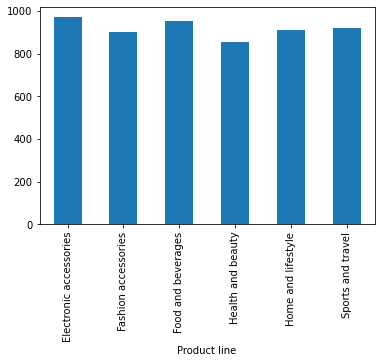

In [65]:
#Which Product Line Is Purchased In The Highest Quantity?
(df.groupby('Product line').sum()['Quantity']).plot(kind='bar')

In [66]:
#Display Daily Sales by Day of the Week
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [67]:
dw_mapping={
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun'
    
}

In [68]:
df['day_of_week']=df['Date'].dt.dayofweek.map(dw_mapping)

<AxesSubplot:>

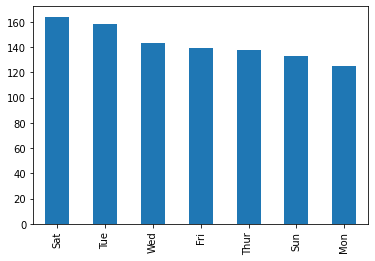

In [69]:
df['day_of_week'].value_counts().plot(kind='bar')

In [70]:
#What Will Be the Highest Months for Sales
month_mapping = {
    1:"Jan",
    2:"Feb",
    3:"March"
    
}

In [71]:
df['month']=df['Date'].dt.month.map(month_mapping)

<AxesSubplot:>

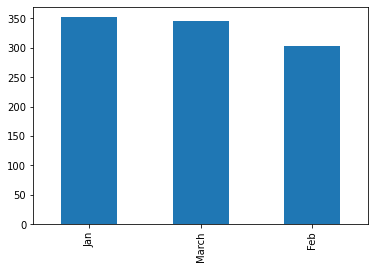

In [72]:
df['month'].value_counts().plot(kind='bar')